In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os
import sys 

pth = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..','uwg'))
if pth not in sys.path: sys.path.insert(0, pth)

In [2]:
import uwg
uwg

<module 'uwg' from 'c:\\Users\\saera\\master\\uwg\\uwg\\__init__.py'>

In [3]:
import numpy as np
import pandas as pd

from uwg import UWG

epw = 'SGP_Singapore.486980_IWEC.epw'

In [4]:
model1 = UWG.from_param_args(
    bldheight=10, blddensity=0.5, vertohor=0.8, grasscover=0.1, 
    treecover=0.1, zone='1A', epw_path=epw, month=8, day=1, 
    nday=31, dtsim=150, c_exch=0.3)      

model1.albroof = 0.9
model1.generate()
model1.simulate()

um:  64.9
Qlatent + Qdehum:  1.5964241893482694
64.89682295209776 79.75245018957665 263.7989019995707
--- ---
check cooling demand breakdown
Tcool 26.69999999999999
Twall 30.16739167930666
T_can 29.30342543280176
T_ceil 26.507343408376357
coolDemand 47.66 29.153425432801782
heatDemand 0.0 29.153425432801782
temp 26.7 26.69999999999999
volcool 299.8499999999999 0.002480957780578697
dehum, cool:  39.67 47.66
dehum + cool, cap:  87.33 277.79
Qcool <= coolcap
---check---
hum 0.013215489215084891 0.00702
temp 26.69999999999999
coolcap 76.11477354592779
150 1.1456763615353378 2260000.0 10
dehum, cool:  39.67 47.66
Qdehum:  39.67
Qlatent + Qdehum:  3.4003347911650295
39.6718365245067 47.65752783787833 277.7911443282036
--- ---
check cooling demand breakdown
Tcool 23.899999999999977
Twall 29.184761144163758
T_can 29.30342543280176
T_ceil 25.19926416773933
coolDemand 79.65 29.153425432801782
heatDemand 0.0 29.153425432801782
temp 23.9 23.899999999999977
volcool 297.0499999999999 0.0049261535942

In [5]:
model2 = UWG.from_param_args(
    bldheight=10, blddensity=0.5, vertohor=0.8, grasscover=0.1, 
    treecover=0.1, zone='1A', epw_path=epw, month=8, day=1, 
    nday=31, dtsim=150, c_exch=0.3)      

model2.albroof = 0.2
model2.generate()
model2.simulate()

m:  1.639158379320392
64.80757146109751 79.5575127608821 263.7989019995707
--- ---
check cooling demand breakdown
Tcool 26.69999999999999
Twall 30.05499955547714
T_can 29.29952220602121
T_ceil 26.605095044397842
coolDemand 48.78 29.14952220602123
heatDemand 0.0 29.14952220602123
temp 26.7 26.69999999999999
volcool 299.84999999999997 0.00253898572729796
dehum, cool:  40.07 48.78
dehum + cool, cap:  88.84 277.79
Qcool <= coolcap
---check---
hum 0.01313434839803924 0.00702
temp 26.699999999999932
coolcap 76.11477354592779
150 1.1458244726297453 2260000.0 10
dehum, cool:  40.07 48.78
Qdehum:  40.07
Qlatent + Qdehum:  3.5662565994868984
40.06519075443565 48.77851079572438 277.7911443282036
--- ---
check cooling demand breakdown
Tcool 23.899999999999977
Twall 29.070541575599577
T_can 29.29952220602121
T_ceil 25.514144994134767
coolDemand 79.45 29.14952220602123
heatDemand 0.0 29.14952220602123
temp 23.9 23.899999999999977
volcool 297.04999999999995 0.0049138388670645836
dehum, cool:  64.84 7

In [6]:
d1 = np.array([ucm.canTemp - 273.15 for ucm in model1.UCMData])
d2 = np.array([ucm.canTemp - 273.15 for ucm in model2.UCMData])

df = pd.DataFrame({'d1': d1, 'd2': d2})
print(df.shape)

(744, 2)


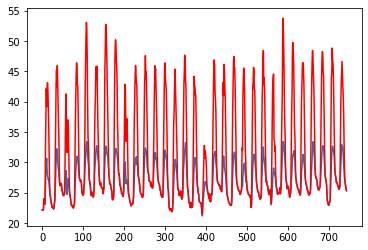

In [16]:
import matplotlib.pyplot as plt 

x = np.array([ucm.roofTemp - 273.15 for ucm in model1.UCMData])
y = np.array([ucm.roofTemp - 273.15 for ucm in model2.UCMData])

f, a = plt.subplots()
a.plot(np.arange(len(x)), x)
a.plot(np.arange(len(x)), y, 'red') # makes sense, higher roof temps

<AxesSubplot:>

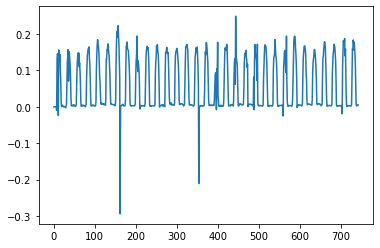

In [9]:
df['subt'] = df.d1 - df.d2
#df.subt.values#.sum()
df.subt.plot()

In [29]:
# #from uwg import Element

# ele = model1.BEM[0].mass
# dt = model1.simTime.dt
# flx1 = model1.BEM[0].building.fluxMass
# temp2 = 0
# flx2 = model1.BEM[0].building.fluxMass
# bc = 0

# #ele.Conduction(dt, flx1, bc, temp2, flx2)

# #Conduction(simTime.dt, BEM[j].building.fluxMass, 1., 0., BEM[j].building.fluxMass)

0.9400424035150189
